# Text Clustering & Topic Modeling Demo

This notebook demonstrates the key functionalities of the Text Clustering project, showing how to:
1. Load and preprocess data
2. Generate embeddings using different techniques
3. Apply clustering methods
4. Visualize results

> ⚠ **<span style="color:red;">Warning:</span>** Each cell may take **multiple minutes** to run.  
> The execution time depends on whether you are using a **GPU** or **CPU**.


In [1]:
# Import required libraries
import sys
import os
import warnings
warnings.simplefilter("ignore")

# Add project root to path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

In [2]:
# Import project modules
from src.download_data import download_data
from src.preprocessing import load_data, preprocess_data
from src.feature_extraction import (
    get_sbert_embeddings, 
    get_tfidf_features, 
    get_word2vec_embeddings
)
from src.clustering import (
    kmeans_clustering, 
    lda_topic_modeling
)
from src.evaluation import evaluate_clustering
from src.visualization import plot_clusters

# Additional data science libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 1. Download and Load Dataset

In [3]:
# Download dataset if not already present
download_data()

# Load and preprocess data
df = load_data('data/people_wiki.csv')
df = preprocess_data(df)

print(f"Dataset loaded. Shape: {df.shape}")
print("\nFirst few preprocessed texts:")
print(df['text'].head())

Downloading...
From (original): https://drive.google.com/uc?id=1_oqcPdcdM2Rf0F5VasNgxqmZBP-c50Hd
From (redirected): https://drive.google.com/uc?id=1_oqcPdcdM2Rf0F5VasNgxqmZBP-c50Hd&confirm=t&uuid=2618f0dd-88fe-4c7a-8049-c1f17604625e
To: d:\ITI\Ml2\final project\tree\notebooks\data\people_wiki.csv
100%|██████████| 116M/116M [00:38<00:00, 3.02MB/s] 


Dataset downloaded successfully and saved to data/people_wiki.csv
Dataset loaded. Shape: (59071, 3)

First few preprocessed texts:
0    digbi morrel born 10 octob 1979 former austral...
1    alfr j lewi aka sandi lewi graduat univers chi...
2    harpdog brown singer harmonica player activ ca...
3    franz rottenstein born waidmannsfeld lower aus...
4    henri krvit born 30 decemb 1974 tallinn better...
Name: text, dtype: object


## 2. Embedding Techniques Comparison

[==================================================] 100.0% 128.1/128.1MB downloaded

--- SBERT Embedding ---
Embedding shape: (59071, 10)
Silhouette Score: 0.5892


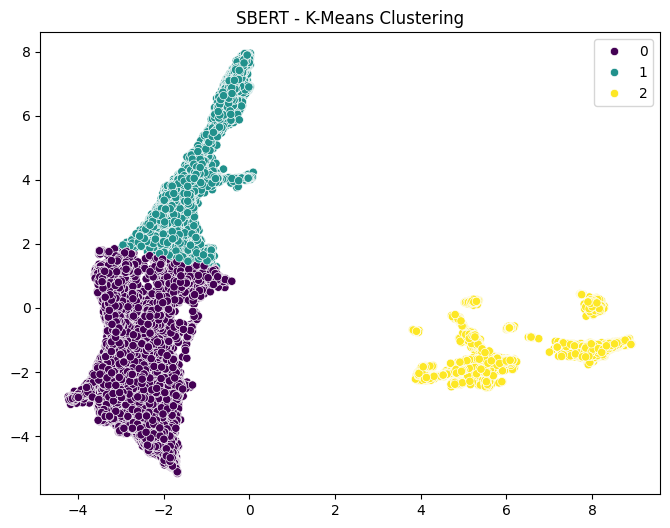


--- TF-IDF Embedding ---
Embedding shape: (59071, 5000)
Silhouette Score: 0.0143


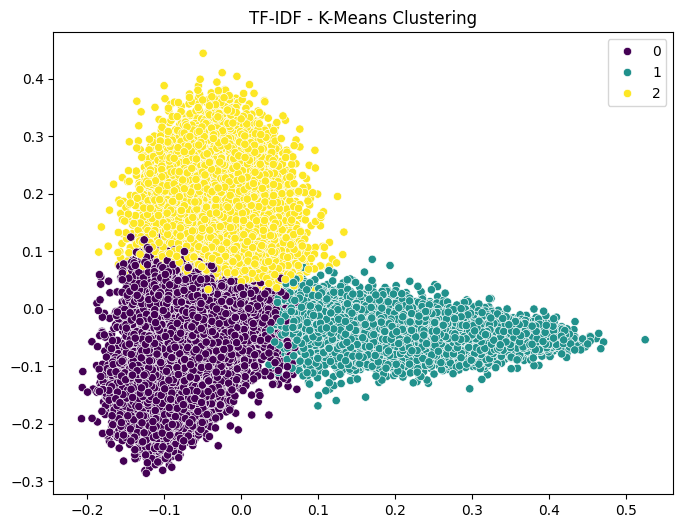


--- Word2Vec Embedding ---
Embedding shape: (59071, 100)
Silhouette Score: 0.1459


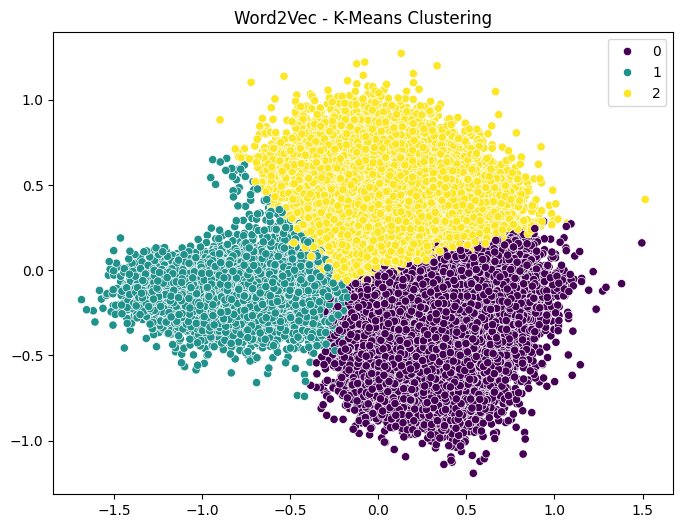

In [4]:
# Generate embeddings using different techniques
embedding_techniques = {
    'SBERT': get_sbert_embeddings(df['text'].tolist()),
    'TF-IDF': get_tfidf_features(df['text'].tolist())[0].toarray(),
    'Word2Vec': get_word2vec_embeddings(df['text'].tolist())
}

# Function to perform clustering and evaluation
def cluster_and_evaluate(embeddings, technique_name):
    print(f"\n--- {technique_name} Embedding ---")
    print(f"Embedding shape: {embeddings.shape}")
    
    # K-Means Clustering
    kmeans_labels = kmeans_clustering(embeddings, n_clusters=3)
    silhouette_score = evaluate_clustering(embeddings, kmeans_labels)
    
    print(f"Silhouette Score: {silhouette_score:.4f}")
    
    # Visualization
    plot_clusters(embeddings, kmeans_labels, title=f"{technique_name} - K-Means Clustering")
    plt.show()

# Compare embeddings
for technique, embeddings in embedding_techniques.items():
    cluster_and_evaluate(embeddings, technique)

## 3. LDA Topic Modeling

In [5]:
# Perform LDA Topic Modeling
lda_topics = lda_topic_modeling(df['text'].tolist(), n_topics=5)

# Print topic distribution
unique_topics, topic_counts = np.unique(lda_topics, return_counts=True)
print("LDA Topic Distribution:")
for topic, count in zip(unique_topics, topic_counts):
    print(f"Topic {topic}: {count} documents")

# Sample documents from each topic
print("\nSample Documents per Topic:")
for topic in unique_topics:
    print(f"\nTopic {topic} Sample:")
    sample_docs = df.loc[lda_topics == topic, 'text'].sample(min(3, sum(lda_topics == topic)))
    print(sample_docs.to_string())

LDA Topic Distribution:
Topic 0: 11021 documents
Topic 1: 13063 documents
Topic 2: 9773 documents
Topic 3: 18336 documents
Topic 4: 6878 documents

Sample Documents per Topic:

Topic 0 Sample:
11654    brian p copenhav born decemb 21 1942 professor...
852      noriv moreira de oliveira born june 22 1945 al...
19564    gianpietro carlesso born 1961 bolzano itali li...

Topic 1 Sample:
6297     wade eric taylor born octob 19 1965 mobil alab...
43807    jame alburi born 1 april 1986 brisban queensla...
21874    mark andrew reynold born august 3 1983 america...

Topic 2 Sample:
32545    timothi w lake born decemb 27 1959 televis new...
17623    annalynn mccord born juli 16 1987 american act...
33973    murat gasaev also transliter murad gasayev eth...

Topic 3 Sample:
58061    lieuten gener john tom sheridan retir us air f...
909      vaai papu vailup samoan politician member parl...
8852     peter william webb born 7 march 1953 australia...

Topic 4 Sample:
33812    eric heatherli born fe

## 4. Advanced Visualization

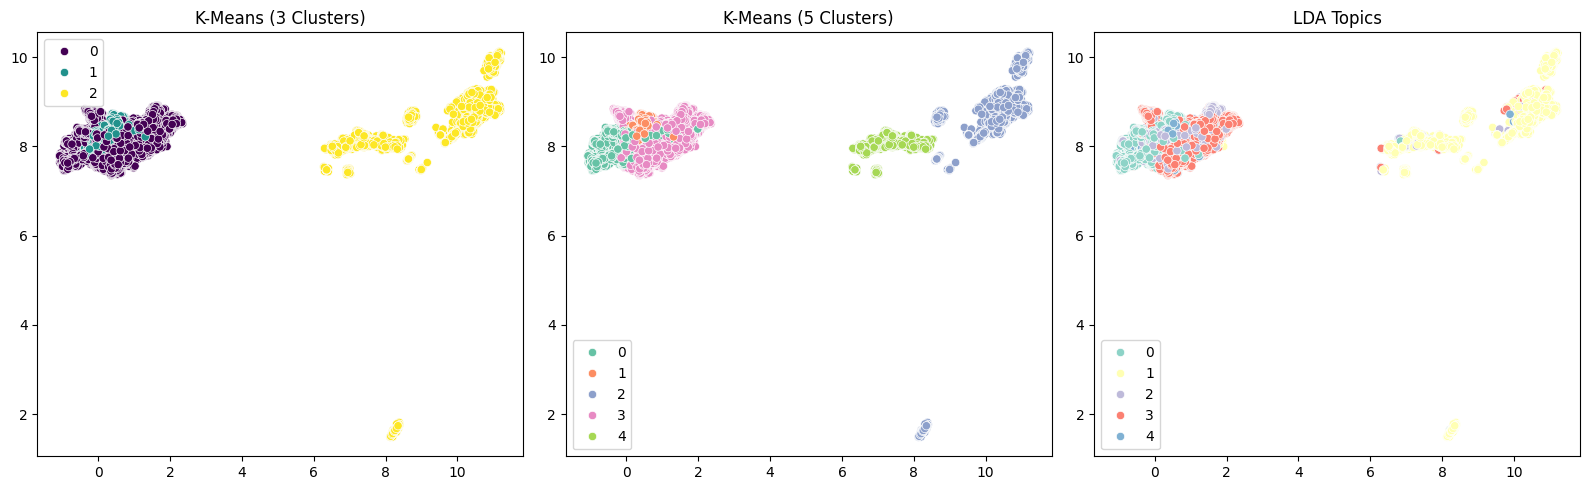

In [9]:
# Select the best embedding (e.g., SBERT)
best_embeddings = embedding_techniques['SBERT']

# Multiple clustering visualizations
plt.figure(figsize=(16, 5))

# K-Means with 3 clusters
plt.subplot(131)
kmeans_3 = kmeans_clustering(best_embeddings, n_clusters=3)
sns.scatterplot(x=best_embeddings[:, 0], y=best_embeddings[:, 1], hue=kmeans_3, palette='viridis')
plt.title('K-Means (3 Clusters)')

# K-Means with 5 clusters
plt.subplot(132)
kmeans_5 = kmeans_clustering(best_embeddings, n_clusters=5)
sns.scatterplot(x=best_embeddings[:, 0], y=best_embeddings[:, 1], hue=kmeans_5, palette='Set2')
plt.title('K-Means (5 Clusters)')

# LDA Topics
plt.subplot(133)
lda_labels = lda_topic_modeling(df['text'].tolist(), n_topics=5)
sns.scatterplot(x=best_embeddings[:, 0], y=best_embeddings[:, 1], hue=lda_labels, palette='Set3')
plt.title('LDA Topics')

plt.tight_layout()
plt.show()

## Next Steps

This demo showcased:
- Data preprocessing
- Different embedding techniques
- K-Means clustering
- LDA topic modeling

Experiment further by:
- Trying different embedding models
- Adjusting cluster/topic numbers
- Using your own datasets